# 2. Disconnected Trajectories

This vignette shows the basic workflow of Via for disconnected trajectories and how to access the different visualizations after running the computations. We use a toydataset with two disconnected components to show different ways to set the root conditions depending on the availability of labels and root level information apriori. 


In [1]:
import pyVIA.core as via
import pyVIA.datasets_via as datasets_via
import scanpy as sc
import pandas as pd 
import umap 
import datasets_via 

### Load data

In [2]:
# A generic wrapper function to check your installation for disconnected datasets is to run: 
# via.main_Toy(ncomps=30, knn=10, random_seed=41, dataset='Toy4',  foldername="/home/shobi/Trajectory/Datasets/Toy4/")

#Since this is a toy dataset, we known the labels of each cell in terms of component and milestone. So T1_M1 is Trajectory1_Milestone1 (the milestones are not listed in any particular order, so M2 is not neccessarily earlier than M5)
'''
foldername="/home/shobi/Trajectory/Datasets/Toy4/"
df_counts = pd.read_csv(foldername + "toy_disconnected_M9_n1000d1000.csv", delimiter=",")
df_ids = pd.read_csv(foldername + "toy_disconnected_M9_n1000d1000_ids_with_truetime.csv", delimiter=",")

#get the cell IDs and sort them to match the order or cell IDs in the df_counts file
df_ids['cell_id_num'] = [int(s[1::]) for s in df_ids['cell_id']]
df_counts = df_counts.drop('Unnamed: 0', 1)
df_ids = df_ids.sort_values(by=['cell_id_num'])
df_ids = df_ids.reset_index(drop=True)
true_label = df_ids['group_id'].tolist()
adata_counts = sc.AnnData(df_counts, obs=df_ids)
'''
#make anndata object with counts and group_ids 
adata_counts = datasets_via.toy_disconnected(foldername='./')
print(adata_counts)
true_label = adata_counts.obs['group_id'].tolist()

#define parameters
#for more generic purposes, dataset can be ='group' if root is a group level assignment corresponding to a group in true_label. or left as '', in which case root_user = [cell index] where cell index is an int
ncomps, knn, random_seed, dataset, root_user  =30,10, 2,'toy', ['T1_M1', 'T2_M1'] 

sc.tl.pca(adata_counts, svd_solver='arpack', n_comps=ncomps)

embedding = umap.UMAP().fit_transform(adata_counts.obsm['X_pca'][:, 0:10])

/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'group_id', 'true_time'


inside umap_ fuzzy simplicial n_neig 15


knn indices size 15000


coo matrix after membership strength 14000
applying symmetry in umap_
size of symmetry only 19568
result.data.size 19568
graph.data.size 19568 0.328 1.0
graph.data.size 19550 19550


### Initialize and run VIA

In this example we provide two group level root cells (T1_M1 and T2_M1). We therefore need to set dataset='group'

2022-08-26 13:57:45.599298	Running VIA over input data of 1000 (samples) x 30 (features)
2022-08-26 13:57:45.599464	Knngraph has 10 neighbors


2022-08-26 13:57:45.869130	Finished global pruning of 10-knn graph used for clustering. Kept 50.2 % of edges. 
2022-08-26 13:57:45.874258	Number of connected components used for clustergraph  is 2
2022-08-26 13:57:45.886074	The number of components in the original full graph is 2
2022-08-26 13:57:45.886147	For downstream visualization purposes we are also constructing a low knn-graph 
2022-08-26 13:57:46.005981	Commencing community detection
2022-08-26 13:57:46.034591	Finished running Leiden algorithm. Found 35 clusters.
2022-08-26 13:57:46.035307	Merging 20 very small clusters (<10)
2022-08-26 13:57:46.036194	Finished detecting communities. Found 15 communities
2022-08-26 13:57:46.036347	Making cluster graph. Global cluster graph pruning level: 1
2022-08-26 13:57:46.038767	Graph has 2 connected components before pruning
2022-08-26 13:57:46.040074	Graph has 2 connected components before pruning n_nonz 1 30


2022-08-26 13:57:47.792487	New root is 7 and majority T1_M1
2022-08-26 13:57:47.792641	Computing lazy-teleporting expected hitting times


2022-08-26 13:57:48.056843	Identifying terminal clusters corresponding to unique lineages...
2022-08-26 13:57:48.056956	Closeness:[2, 4]
2022-08-26 13:57:48.056979	Betweenness:[2, 3, 4]
2022-08-26 13:57:48.056998	Out Degree:[2, 3, 4]
2022-08-26 13:57:48.057792	Terminal clusters corresponding to unique lineages in this component are [3, 4] 


2022-08-26 13:57:48.167360	From root 2,  the Terminal state 3 is reached 499 times.


2022-08-26 13:57:48.304974	From root 2,  the Terminal state 4 is reached 279 times.
2022-08-26 13:57:48.331438	New root is 3 and majority T2_M1
2022-08-26 13:57:48.332732	Computing lazy-teleporting expected hitting times


/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/pyVIA/core.py:2358: RuntimeWarning: invalid value encountered in true_divide
  bp_array = bp_array / bp_array.sum(axis=1)[:, None]


2022-08-26 13:57:48.711910	Identifying terminal clusters corresponding to unique lineages...
2022-08-26 13:57:48.712464	Closeness:[0, 5, 6, 7]
2022-08-26 13:57:48.712514	Betweenness:[2, 3, 5, 7]
2022-08-26 13:57:48.712544	Out Degree:[0, 3, 5, 6, 7]
2022-08-26 13:57:48.714134	Terminal clusters corresponding to unique lineages in this component are [0, 3, 5, 6, 7] 


2022-08-26 13:57:48.829372	From root 2,  the Terminal state 0 is reached 500 times.


2022-08-26 13:57:48.988800	From root 2,  the Terminal state 3 is reached 259 times.


2022-08-26 13:57:49.218724	From root 2,  the Terminal state 5 is reached 90 times.


2022-08-26 13:57:49.389482	From root 2,  the Terminal state 6 is reached 239 times.


2022-08-26 13:57:49.521229	From root 2,  the Terminal state 7 is reached 500 times.
2022-08-26 13:57:49.536734	Terminal clusters corresponding to unique lineages are [11, 14, 1, 5, 8, 9, 10] 
2022-08-26 13:57:49.536833	Begin projection of pseudotime and lineage likelihood


2022-08-26 13:57:49.674917	Graph has 2 connected components before pruning
2022-08-26 13:57:49.676748	Graph has 2 connected components before pruning n_nonz 1 2
2022-08-26 13:57:49.677570	7.1% links trimmed from local pruning relative to start
2022-08-26 13:57:49.677616	50.0% links trimmed from global pruning relative to start


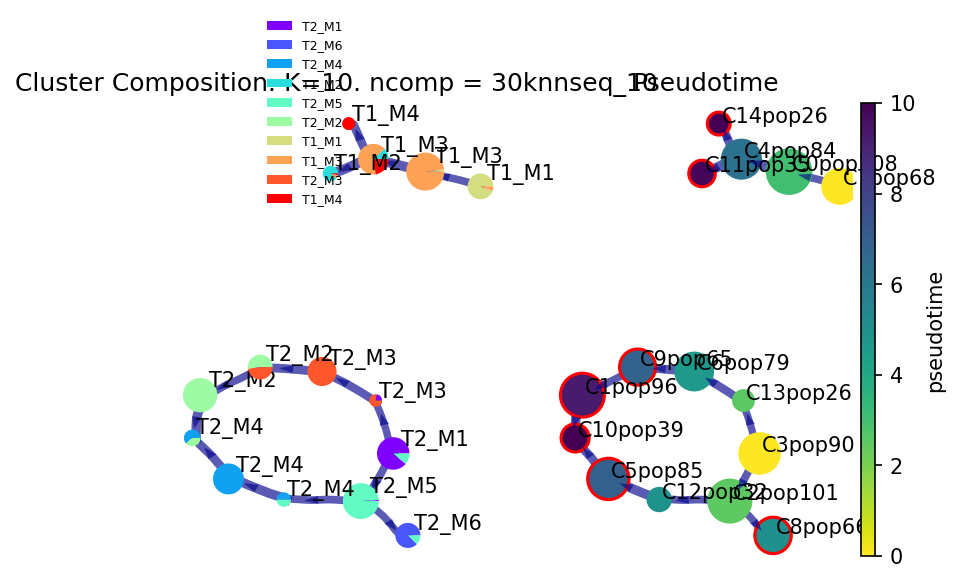

2022-08-26 13:57:51.041548	Time elapsed 5.3 seconds


In [3]:
'''
# knn: number of nearest neighbors for the KNN-graph 
# clustergraph_pruning: typically 0-3, the number of standard deviations for clustergraph pruning. level of pruning applied to the clustergraph carried forward for pseudotime and lineage probability calculations. Larger means less pruning  
# true_label: list of annotations. if these are unavailable then leave as default None
# dist_std_local: local pruning on the singlecell graph used for clustering step, 1 is quite quite minimal level of pruning.  
# too_big_factor: default 0.3. Clusters that are bigger than 30% of the entire cell population will be re-clustered. If you only plan to do one iteration of VIA before visualizing TI, consider lowering this to 0.1-0.2.  
# preserve_disconnected: if you suspect disconnected trajectories, set this to False
# dataset = 'group': works for any dataset where the root is provided as a group ID in the true_label. e.g. if root = ['Day0'], then the root will be selected as a cluster which has root like properties and is largely made up of 'Day0' cells. 
            #If you wish to run a second finegrained iteration of VIA on a disconnected dataset, but uses the terminal clusters from the previous coarse run, then the dataset should be set as 'toy' and the true_labels formatted as "T1_M1" where Tx is the x'th component and My is the y'th cluster.
            # otherwise for disconnected datasets, you can just run a single iteration of VIA where you vary too_big_factor and other parameters to change granularity and set the dataset as '' or 'group' depending on the root_user type as [groupX, groupZ ...] or [cell indices...]  
            # dataset, can be left as default value '', but then the root must be a cell index corresponding to a best guess. 
# visual_cluster_graph_pruning: this impacts the level of pruning done to the clustergraph before visualization. Does not impact underlying computations  
# Max_visual_outgoing_edges: controls number of edges extending from each node
'''

v0 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15, dist_std_local=1,
             knn=knn, cluster_graph_pruning_std=1, too_big_factor=0.3, root_user=root_user, preserve_disconnected=True, dataset='group',random_seed=random_seed)
v0.run_VIA()

### Initial state 
#### Roots can also be provided as cell indices
If the roots are provided as indices, the dataset parameter should be set to dataset=''. If the roots are group level labels, then dataset = 'group'. This tells via which approach to take for identifying the root. 

2022-08-26 13:58:00.423867	Running VIA over input data of 1000 (samples) x 30 (features)
2022-08-26 13:58:00.423964	Knngraph has 10 neighbors


2022-08-26 13:58:00.919039	Finished global pruning of 10-knn graph used for clustering. Kept 50.2 % of edges. 
2022-08-26 13:58:00.924128	Number of connected components used for clustergraph  is 2
2022-08-26 13:58:00.936262	The number of components in the original full graph is 2
2022-08-26 13:58:00.936341	For downstream visualization purposes we are also constructing a low knn-graph 
2022-08-26 13:58:01.057686	Commencing community detection
2022-08-26 13:58:01.087212	Finished running Leiden algorithm. Found 35 clusters.
2022-08-26 13:58:01.087721	Merging 20 very small clusters (<10)
2022-08-26 13:58:01.088678	Finished detecting communities. Found 15 communities
2022-08-26 13:58:01.088964	Making cluster graph. Global cluster graph pruning level: 1
2022-08-26 13:58:01.091383	Graph has 2 connected components before pruning
2022-08-26 13:58:01.092681	Graph has 2 connected components before pruning n_nonz 1 30


2022-08-26 13:58:01.291769	The root index, 136 provided by the user belongs to cluster number 7                                  and corresponds to cell type T1_M1
2022-08-26 13:58:01.293526	Computing lazy-teleporting expected hitting times


2022-08-26 13:58:01.560537	Identifying terminal clusters corresponding to unique lineages...
2022-08-26 13:58:01.560732	Closeness:[2, 4]
2022-08-26 13:58:01.560781	Betweenness:[2, 3, 4]
2022-08-26 13:58:01.561287	Out Degree:[2, 3, 4]
2022-08-26 13:58:01.562160	Terminal clusters corresponding to unique lineages in this component are [3, 4] 


2022-08-26 13:58:01.676328	From root 2,  the Terminal state 3 is reached 499 times.


2022-08-26 13:58:01.823952	From root 2,  the Terminal state 4 is reached 279 times.
2022-08-26 13:58:01.848687	The root index, 4 provided by the user belongs to cluster number 3                                  and corresponds to cell type T2_M1
2022-08-26 13:58:01.850752	Computing lazy-teleporting expected hitting times


/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/pyVIA/core.py:2358: RuntimeWarning: invalid value encountered in true_divide
  bp_array = bp_array / bp_array.sum(axis=1)[:, None]


2022-08-26 13:58:02.271244	Identifying terminal clusters corresponding to unique lineages...
2022-08-26 13:58:02.271359	Closeness:[0, 5, 6, 7]
2022-08-26 13:58:02.271382	Betweenness:[2, 3, 5, 7]
2022-08-26 13:58:02.271399	Out Degree:[0, 3, 5, 6, 7]
2022-08-26 13:58:02.272428	Terminal clusters corresponding to unique lineages in this component are [0, 3, 5, 6, 7] 


2022-08-26 13:58:02.375203	From root 2,  the Terminal state 0 is reached 500 times.


2022-08-26 13:58:02.525870	From root 2,  the Terminal state 3 is reached 259 times.


2022-08-26 13:58:02.707737	From root 2,  the Terminal state 5 is reached 90 times.


2022-08-26 13:58:02.877844	From root 2,  the Terminal state 6 is reached 239 times.


2022-08-26 13:58:03.032406	From root 2,  the Terminal state 7 is reached 500 times.
2022-08-26 13:58:03.052315	Terminal clusters corresponding to unique lineages are [11, 14, 1, 5, 8, 9, 10] 
2022-08-26 13:58:03.052535	Begin projection of pseudotime and lineage likelihood


2022-08-26 13:58:03.212432	Graph has 2 connected components before pruning
2022-08-26 13:58:03.213815	Graph has 2 connected components before pruning n_nonz 1 2
2022-08-26 13:58:03.214374	7.1% links trimmed from local pruning relative to start
2022-08-26 13:58:03.214414	50.0% links trimmed from global pruning relative to start


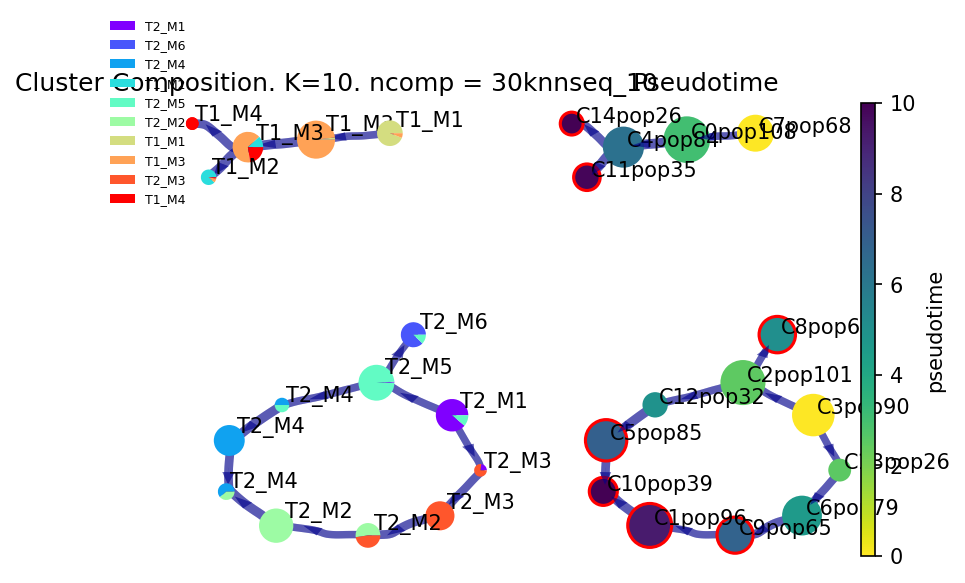

2022-08-26 13:58:04.594770	Time elapsed 4.0 seconds


In [4]:
#consider providing the roots as indices corresponding to the desired start cells
root_user, dataset = [136,4], ''
v0 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15, dist_std_local=1,
             knn=knn, cluster_graph_pruning_std=1,             too_big_factor=0.3, root_user=root_user, preserve_disconnected=True, dataset='', random_seed=random_seed)
v0.run_VIA()

### Fine-grained vector field
Draw a stream plot that shows the directionality at a higher resolution

/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/pyVIA/core.py:1902: RuntimeWarning: divide by zero encountered in true_divide
  T = T.multiply(csr_matrix(1.0 / np.abs(T).sum(1)))  # rows sum to one
/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/pyVIA/core.py:1931: RuntimeWarning: Mean of empty slice.
  V_emb[i] = probs.dot(dX) - probs.mean() * dX.sum(0)
/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


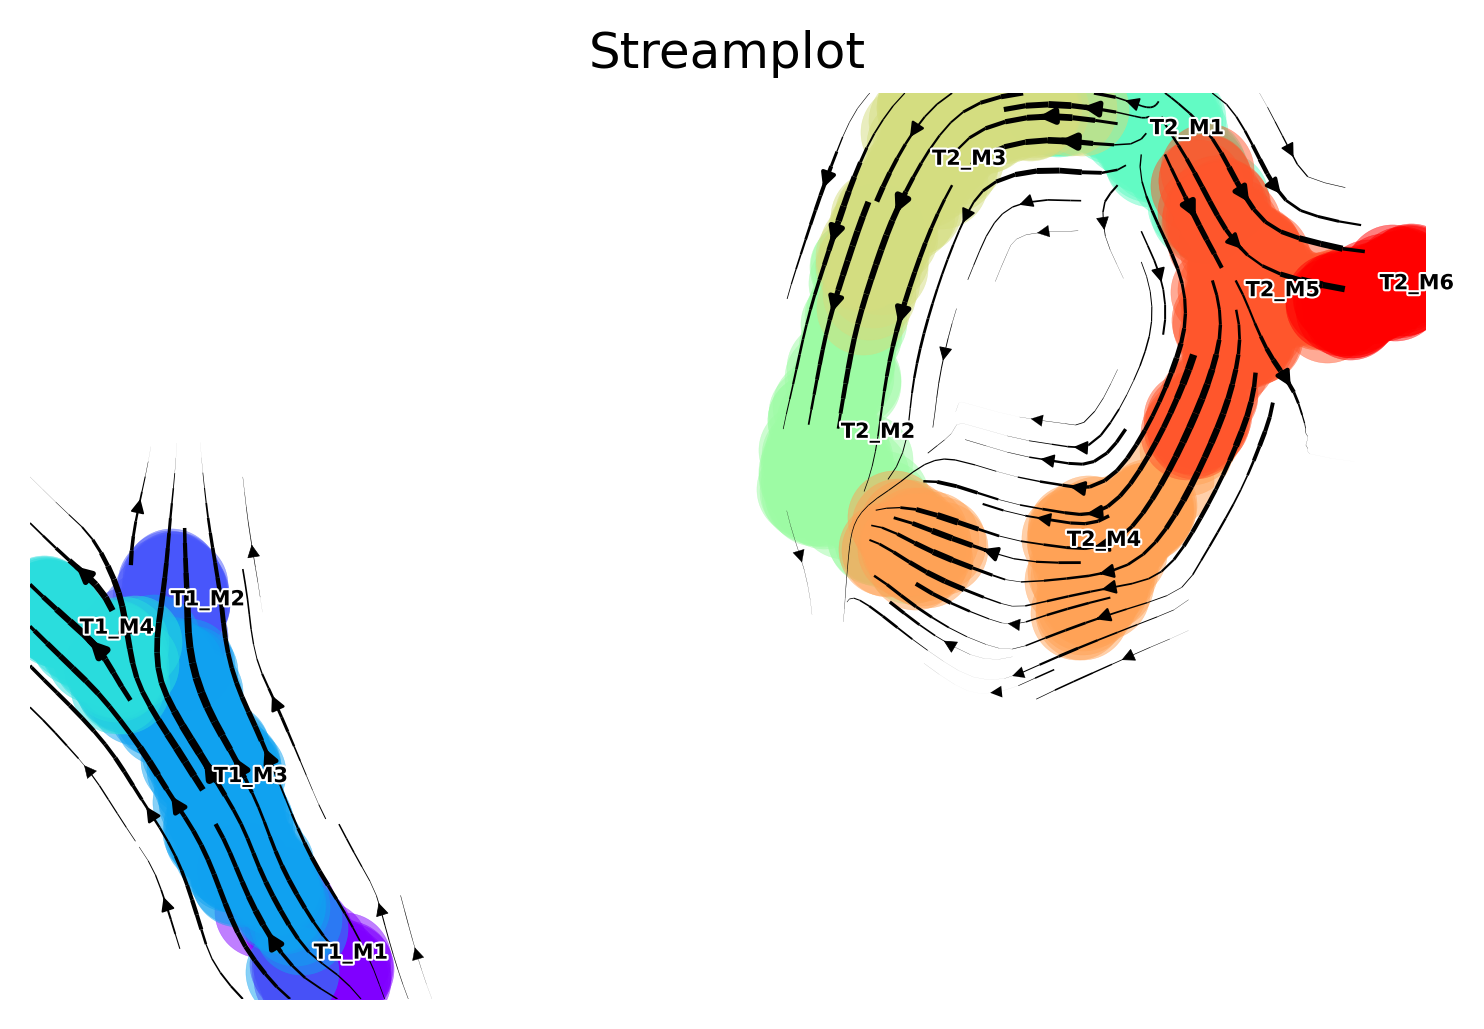

In [6]:
#default parameters:
# scatter_size=500
# scatter_alpha=0.5
# marker_edgewidth=0.1, outline of scatter points
# density_stream = 2, spacing between field lines
# smooth_transition=1,smoothing of transition matrix over neighbors of neighbors
# color_scheme = 'annotation', corresponds to true_labels provided. Can also be set to 'cluster' and 'time'
# add_outline_clusters=False

via.via_streamplot(v0, embedding)

/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/pyVIA/core.py:1931: RuntimeWarning: Mean of empty slice.
  V_emb[i] = probs.dot(dX) - probs.mean() * dX.sum(0)
/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2022-07-09 16:37:52.063276	Inside animated. File will be saved to location /home/shobi/Trajectory/Datasets/Toy4/toy4_animation.gif


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

total number of stream lines 560


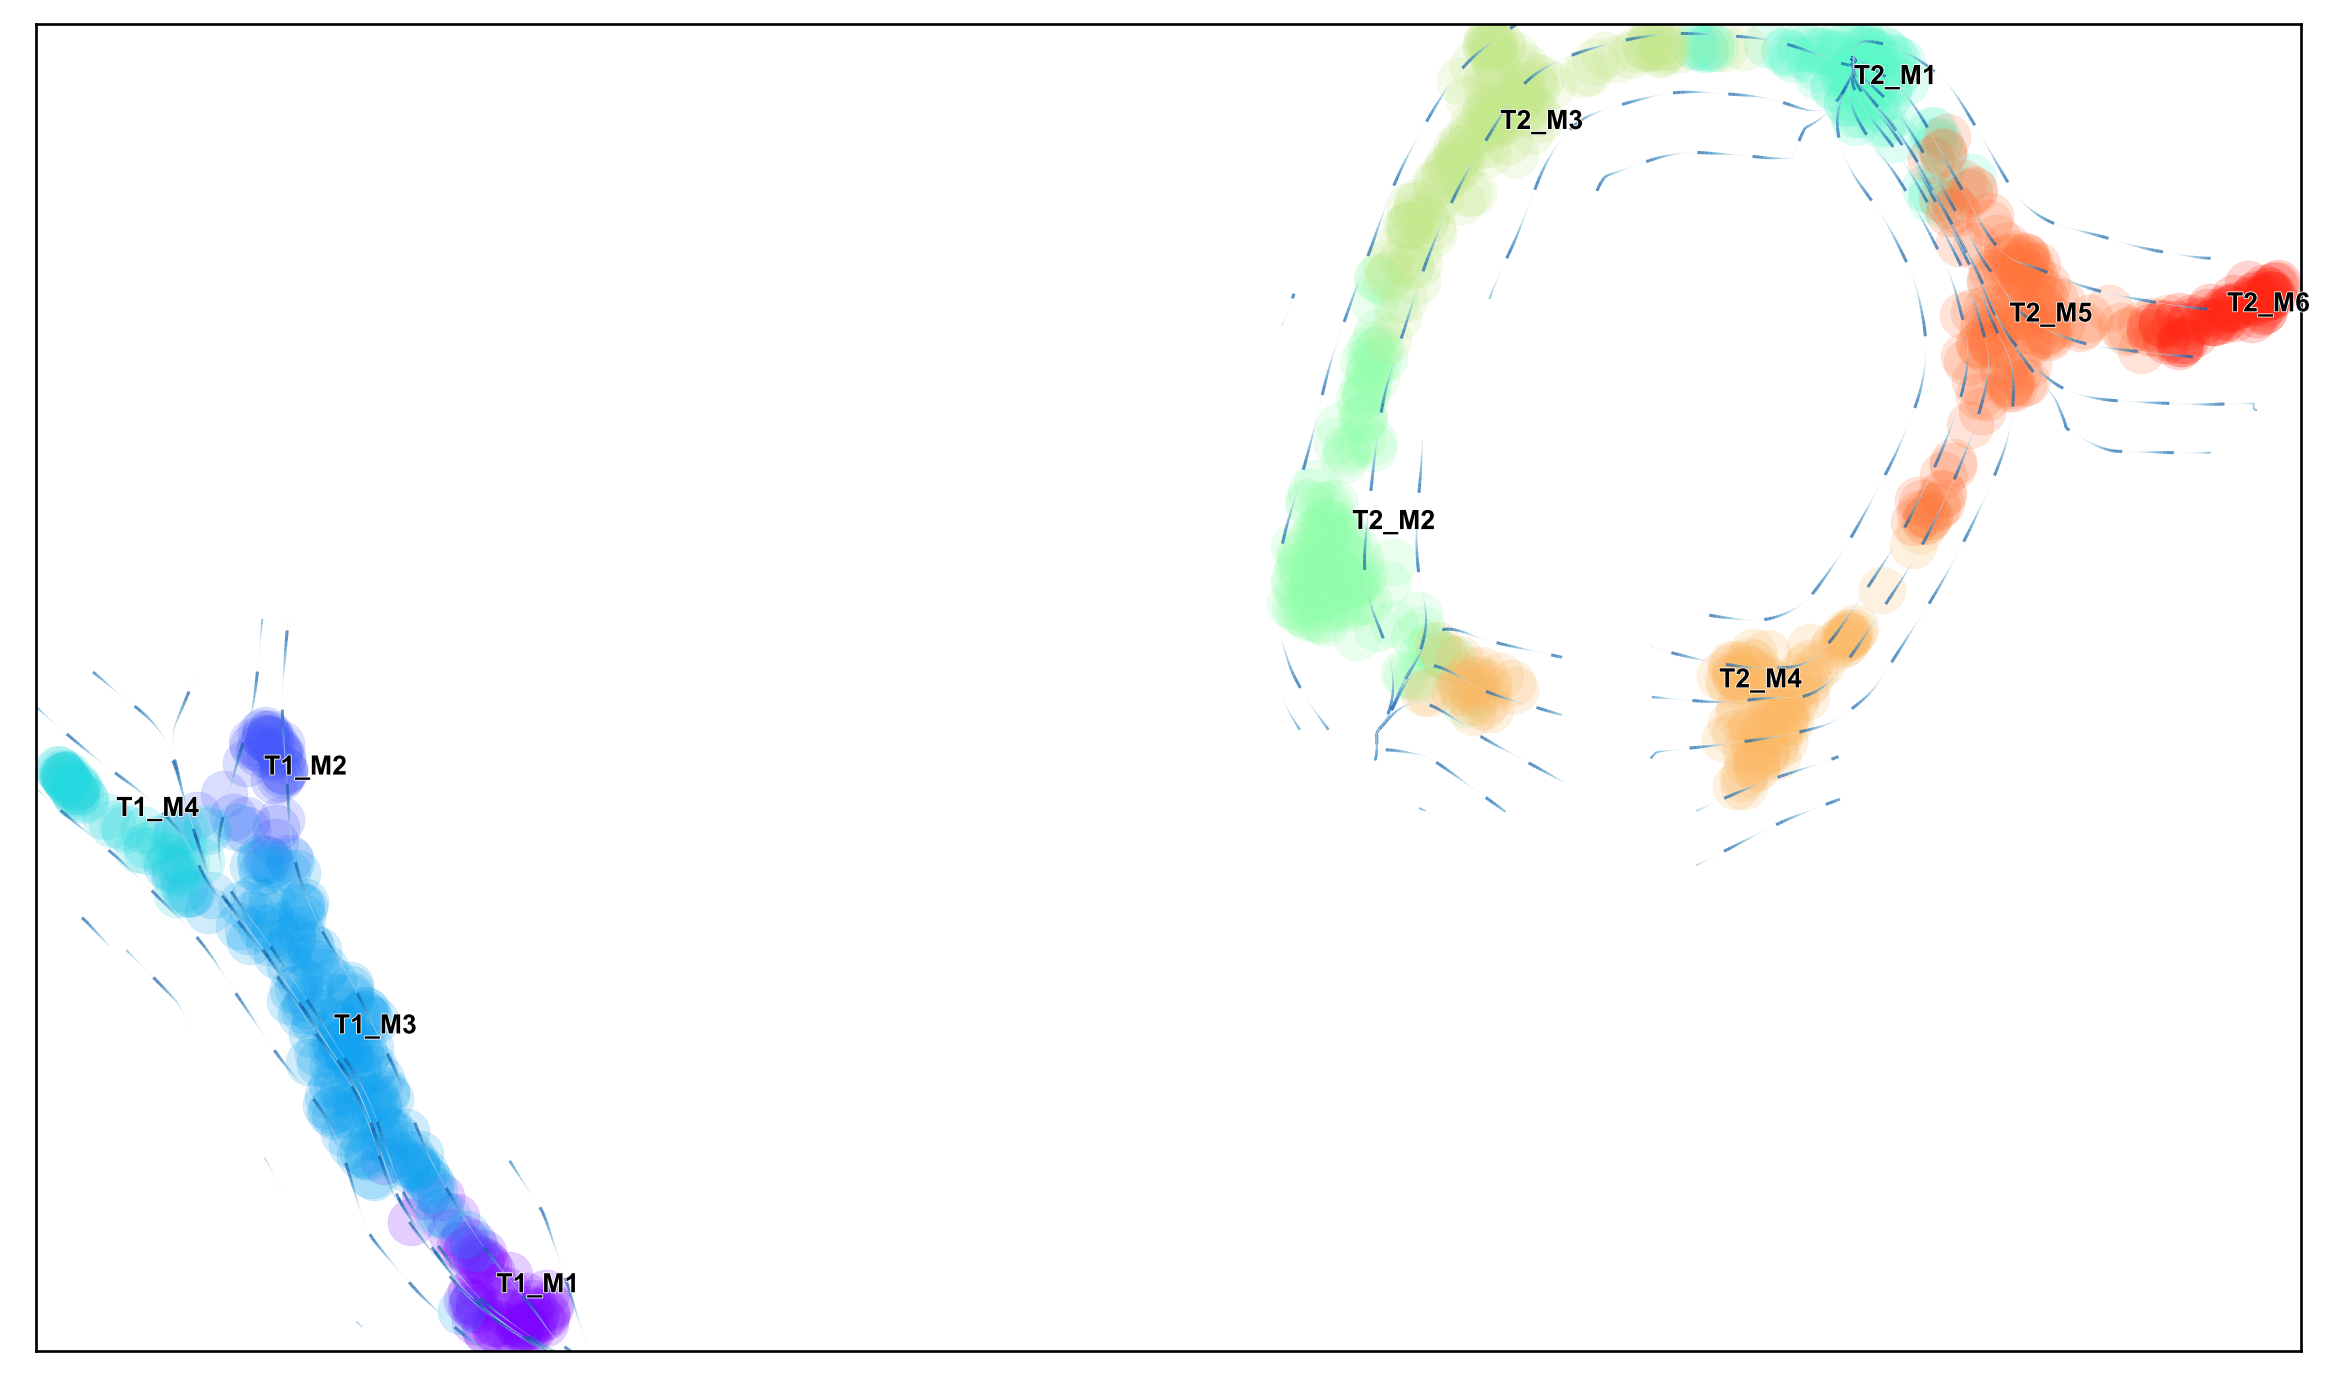

In [8]:
sc.settings.set_figure_params(dpi=120, facecolor='white')
via.animated_streamplot(v0, embedding, scatter_size=200, scatter_alpha=0.2, density_grid=1, saveto='/home/shobi/Trajectory/Datasets/Toy4/toy4_animation.gif' )

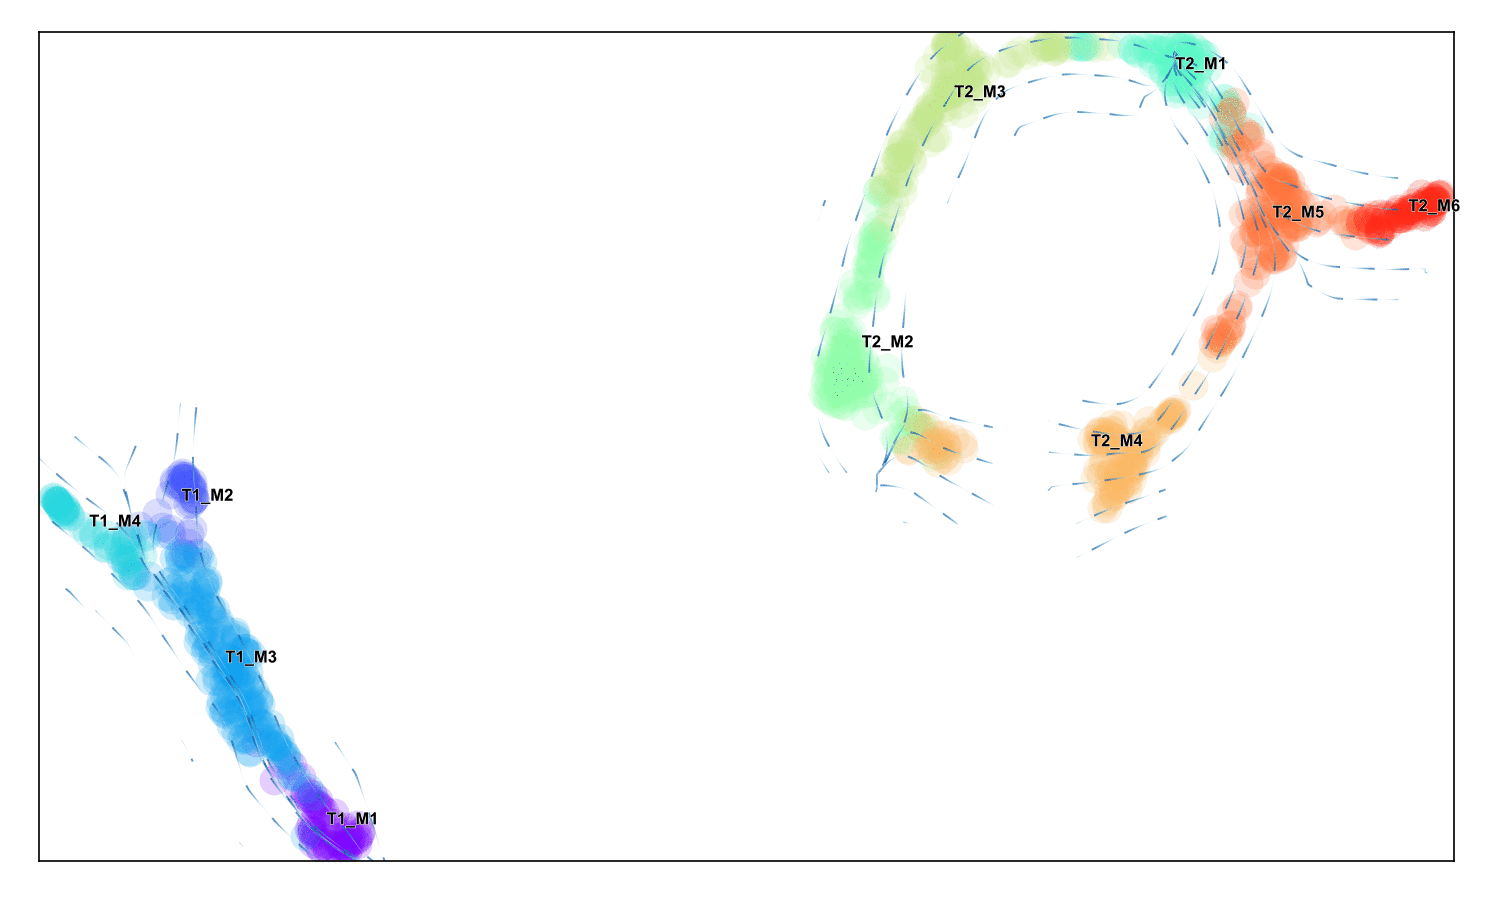

In [9]:
from IPython.display import Image
with open('/home/shobi/Trajectory/Datasets/Toy4/toy4_animation.gif','rb') as file:
    display(Image(file.read()))

### Overall Trajectory
Draw high-level pseudotime and main trajectories by projecting clustergraph onto umap

/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/pyVIA/plotting_via.py:790: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  path_orange = G_orange.get_shortest_paths(super_root, to=fst_i)[0]
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:01

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

2022-08-26 13:58:57.768483	Super cluster 1 is a super terminal with sub_terminal cluster 11
2022-08-26 13:58:57.768626	Super cluster 5 is a super terminal with sub_terminal cluster 14
2022-08-26 13:58:57.768693	Super cluster 8 is a super terminal with sub_terminal cluster 1
2022-08-26 13:58:57.768750	Super cluster 9 is a super terminal with sub_terminal cluster 5
2022-08-26 13:58:57.768805	Super cluster 10 is a super terminal with sub_terminal cluster 8
2022-08-26 13:58:57.768858	Super cluster 11 is a super terminal with sub_terminal cluster 9
2022-08-26 13:58:57.768920	Super cluster 14 is a super terminal with sub_terminal cluster 10


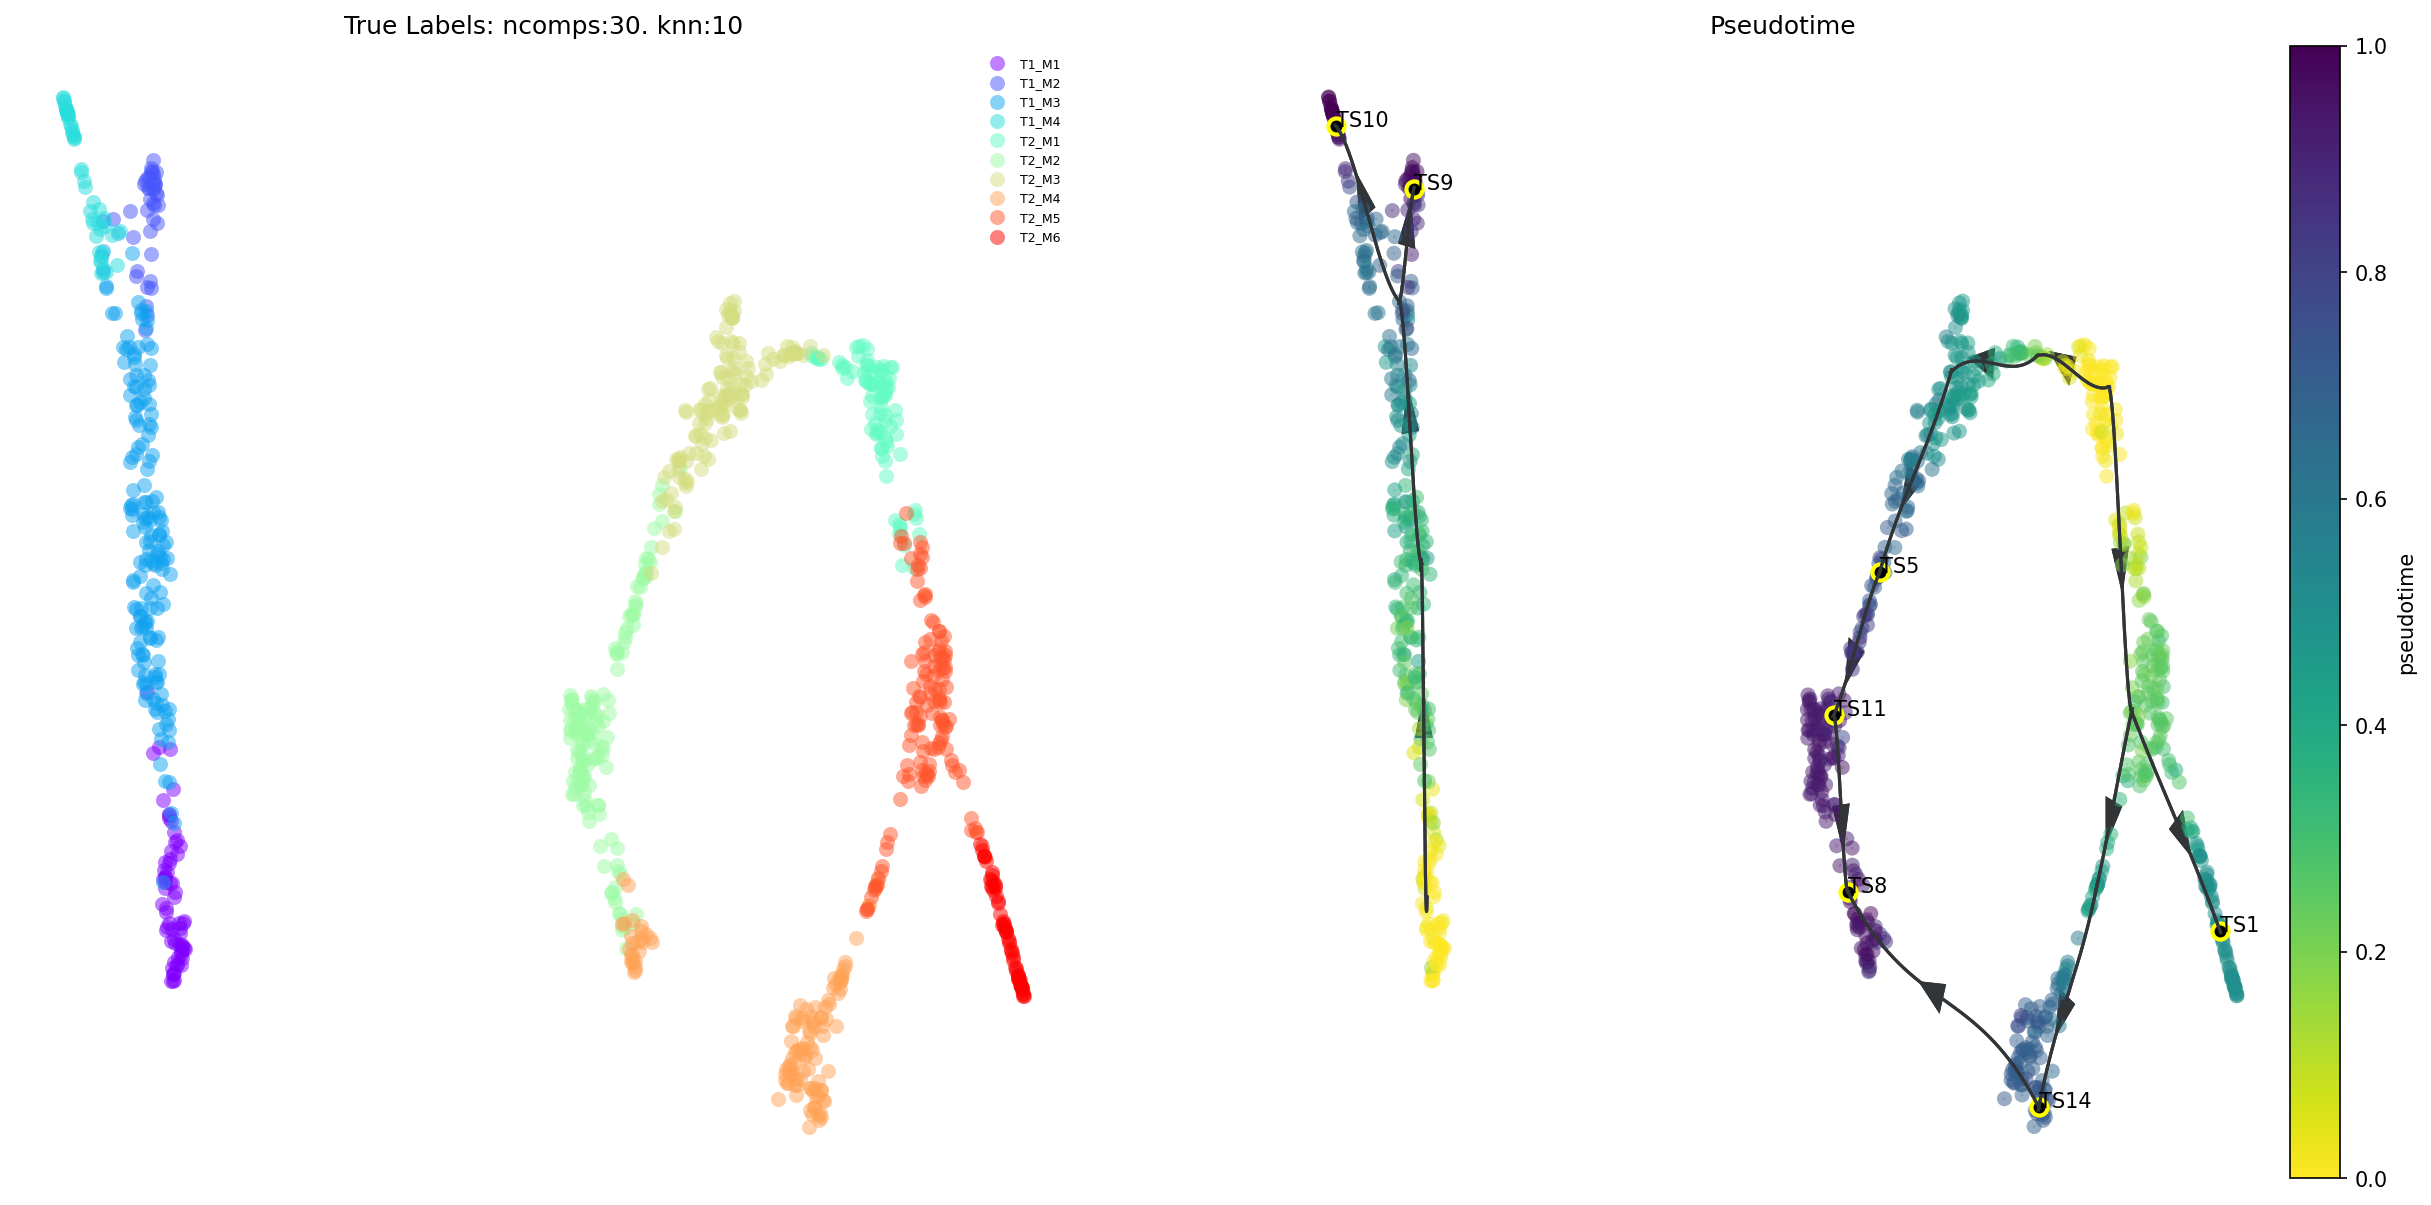

In [5]:
# draw overall pseudotime and main trajectories
via.draw_trajectory_gams(via_coarse=v0, via_fine=v0, embedding=embedding)

### Lineage Probabilities
Plot the lineage probabilities for each lineage (associated with its terminal state, e.g. the leaf nodes)

2022-06-13 13:24:07.684661	Cluster path on clustergraph starting from Root Cluster 7to Terminal Cluster 11
2022-06-13 13:24:07.684873	Cluster path on clustergraph starting from Root Cluster 7to Terminal Cluster 14
2022-06-13 13:24:07.686380	Cluster path on clustergraph starting from Root Cluster 3to Terminal Cluster 1
2022-06-13 13:24:07.686491	Cluster path on clustergraph starting from Root Cluster 3to Terminal Cluster 8
2022-06-13 13:24:07.686539	Cluster path on clustergraph starting from Root Cluster 3to Terminal Cluster 9
2022-06-13 13:24:07.686581	Cluster path on clustergraph starting from Root Cluster 3to Terminal Cluster 10
2022-06-13 13:24:07.806604	Cluster level path on sc-knnGraph from Root Cluster 3 to Terminal Cluster 1 along path: [3, 3, 3, 3, 13, 6, 9, 1, 1]
2022-06-13 13:24:07.845950	Cluster level path on sc-knnGraph from Root Cluster 3 to Terminal Cluster 2 along path: [3, 3, 3, 3, 2, 2, 2, 2]


/home/shobi/PycharmProjects/Via/core_working.py:787: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  path_orange = G_orange.get_shortest_paths(via_fine.root[ii], to=fst_i)[0]


2022-06-13 13:24:07.889501	Cluster level path on sc-knnGraph from Root Cluster 3 to Terminal Cluster 3 along path: [3]
2022-06-13 13:24:07.936442	Cluster level path on sc-knnGraph from Root Cluster 7 to Terminal Cluster 4 along path: [7, 7, 7, 7, 0, 4, 11]
2022-06-13 13:24:07.977239	Cluster level path on sc-knnGraph from Root Cluster 3 to Terminal Cluster 5 along path: [3, 3, 3, 3, 3, 12, 5, 5, 5, 5, 5]
2022-06-13 13:24:08.006368	Cluster level path on sc-knnGraph from Root Cluster 3 to Terminal Cluster 6 along path: [3, 3, 3, 3, 13, 6]


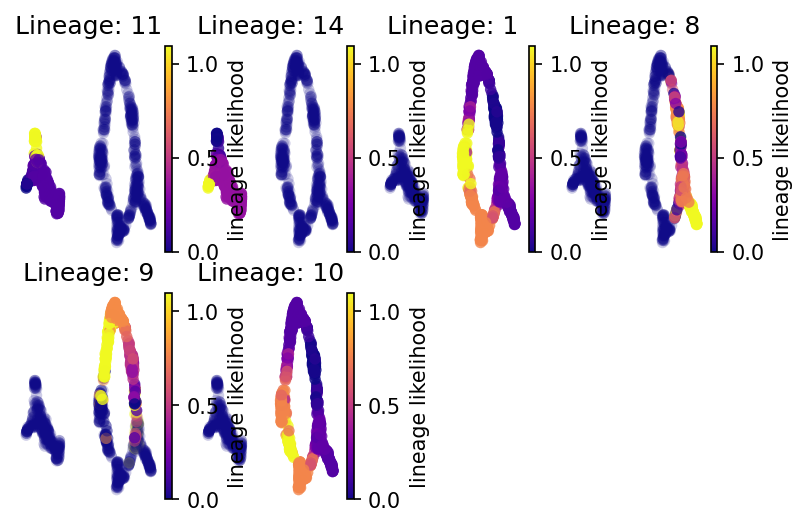

In [11]:
via.draw_sc_lineage_probability(via_coarse=v0, via_fine=v0,embedding=embedding)


### Gene Dynamics
Plot the gene expression levels along each lineage for marker genes. Here we use dummy values for the Genes which are just the values of the initial PCs for illustrative purposes

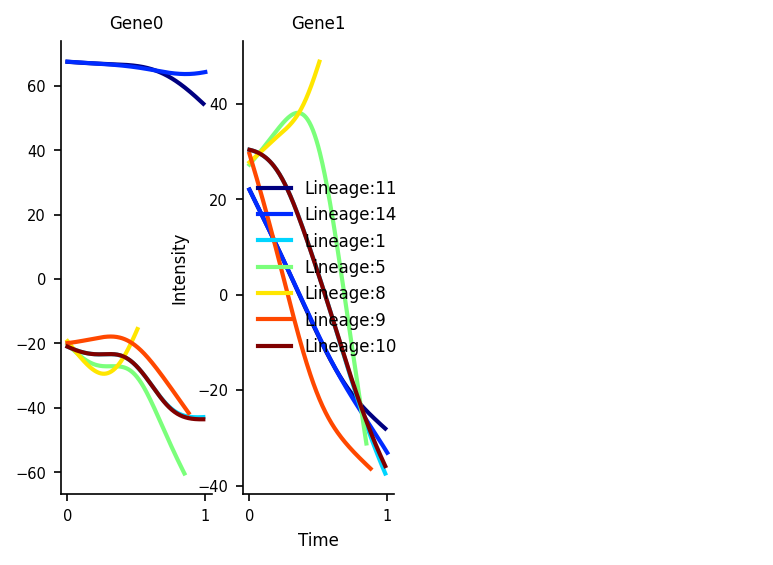

In [7]:
df_subset = pd.DataFrame(adata_counts.obsm['X_pca'][:, 0:5], columns=['Gene0', 'Gene1', 'Gene2', 'Gene3', 'Gene4'])
via.get_gene_expression(via0=v0, gene_exp=df_subset, marker_genes=['Gene0', 'Gene1'], fontsize_=8) # since we dont want to plot all the genes in this dataframe, we select the two we wish to see trends for by setting marker_genes = ['Gene0', 'Gene1']

### Optional Second Iterations
Sometimes it is desirable to construct a more finegrained clustergraph that uses the terminal states detected in a coarser iteration. 

The rest of the vignette covers how to link the fine and coarse grained iterations of Via. However, it is also possible to simply run a single iteration of Via (as done above) and do so at different levels of granularity by changing too_big_factor, or knn

2022-08-26 14:02:26.958537	Running VIA over input data of 1000 (samples) x 30 (features)
2022-08-26 14:02:26.958635	Knngraph has 10 neighbors
2022-08-26 14:02:27.107398	Finished global pruning of 10-knn graph used for clustering. Kept 50.2 % of edges. 
2022-08-26 14:02:27.107671	Commencing community detection
2022-08-26 14:02:27.138622	Finished running Leiden algorithm. Found 35 clusters.
2022-08-26 14:02:27.139043	Found 10 clusters that are too big
2022-08-26 14:02:27.139072	Examining clusters that are above the too_big threshold
2022-08-26 14:02:27.139112	Cluster 5 contains 81>50 samples and is too big
2022-08-26 14:02:27.147259	Examining clusters that are above the too_big threshold
2022-08-26 14:02:27.147326	Cluster 1 contains 94>50 samples and is too big
2022-08-26 14:02:27.157202	Examining clusters that are above the too_big threshold
2022-08-26 14:02:27.157285	Cluster 3 contains 89>50 samples and is too big


2022-08-26 14:02:27.168109	Examining clusters that are above the too_big threshold
2022-08-26 14:02:27.168187	Cluster 2 contains 94>50 samples and is too big
2022-08-26 14:02:27.176949	Examining clusters that are above the too_big threshold
2022-08-26 14:02:27.177025	Cluster 0 contains 99>50 samples and is too big
2022-08-26 14:02:27.187869	Examining clusters that are above the too_big threshold
2022-08-26 14:02:27.187938	Cluster 4 contains 83>50 samples and is too big
2022-08-26 14:02:27.195412	Examining clusters that are above the too_big threshold
2022-08-26 14:02:27.195474	Cluster 8 contains 66>50 samples and is too big
2022-08-26 14:02:27.201682	Examining clusters that are above the too_big threshold
2022-08-26 14:02:27.201738	Cluster 6 contains 79>50 samples and is too big
2022-08-26 14:02:27.209278	Examining clusters that are above the too_big threshold
2022-08-26 14:02:27.209342	Cluster 7 contains 68>50 samples and is too big
2022-08-26 14:02:27.215621	Examining clusters that a

2022-08-26 14:02:27.696048	The root index, 4 provided by the user belongs to cluster number 19                                  and corresponds to cell type T2_M1
2022-08-26 14:02:27.698068	Computing lazy-teleporting expected hitting times


no sub cluster has majority made of super-cluster  10
2022-08-26 14:02:29.052356	Terminal clusters corresponding to unique lineages in this component are [13, 7, 24, 35, 0] 


2022-08-26 14:02:29.312677	From root 17,  the Terminal state 13 is reached 312 times.


2022-08-26 14:02:29.682303	From root 17,  the Terminal state 7 is reached 99 times.


2022-08-26 14:02:30.062233	From root 17,  the Terminal state 24 is reached 201 times.


2022-08-26 14:02:30.482144	From root 17,  the Terminal state 35 is reached 127 times.


2022-08-26 14:02:30.783183	From root 17,  the Terminal state 0 is reached 303 times.
2022-08-26 14:02:30.807765	The root index, 136 provided by the user belongs to cluster number 47                                  and corresponds to cell type T1_M1
2022-08-26 14:02:30.810428	Computing lazy-teleporting expected hitting times


/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/pyVIA/core.py:2358: RuntimeWarning: invalid value encountered in true_divide
  bp_array = bp_array / bp_array.sum(axis=1)[:, None]


2022-08-26 14:02:31.421586	Terminal clusters corresponding to unique lineages in this component are [0, 1] 


2022-08-26 14:02:31.641180	From root 13,  the Terminal state 0 is reached 175 times.


2022-08-26 14:02:31.812230	From root 13,  the Terminal state 1 is reached 500 times.
2022-08-26 14:02:31.831019	Terminal clusters corresponding to unique lineages are [15, 9, 36, 52, 0, 1, 4] 
2022-08-26 14:02:31.831128	Begin projection of pseudotime and lineage likelihood


2022-08-26 14:02:31.984687	Graph has 2 connected components before pruning
2022-08-26 14:02:31.987007	Graph has 2 connected components before pruning n_nonz 2 2
2022-08-26 14:02:31.997658	Graph has 2 connected components after reconnecting
2022-08-26 14:02:31.997954	72.0% links trimmed from local pruning relative to start
2022-08-26 14:02:31.997999	82.1% links trimmed from global pruning relative to start


/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


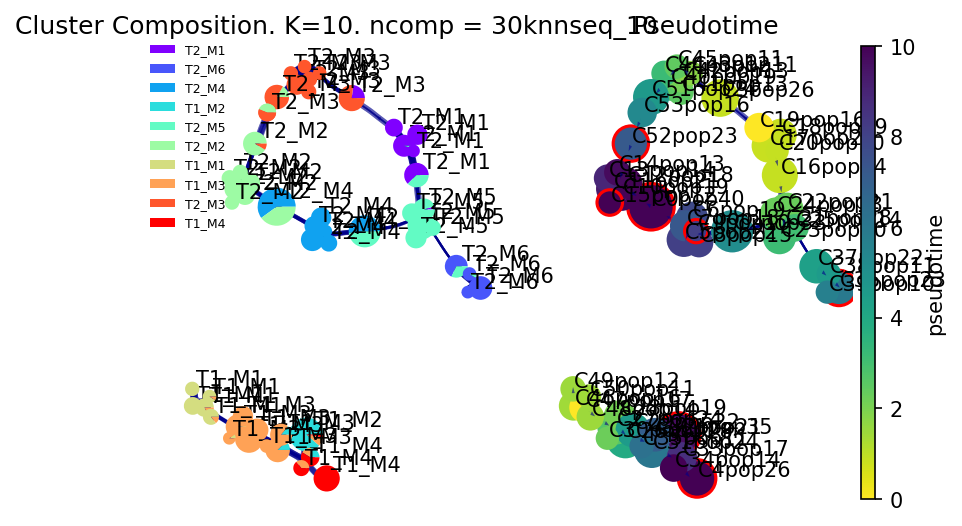

2022-08-26 14:02:37.587086	Time elapsed 10.5 seconds


In [9]:
#the only additional step to link the two iterations is to pass on the v0 iteration to v1 by setting via_coarse = v0 when initializing VIA and setting is_coarse = False
root_user, dataset = [136,4], '' #we use the indices of cells as the roots, but could also have used the group labels 
#root_user, dataset = ['T1_M1', 'T2_M1'], 'group' 
v1 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15, dist_std_local=1,
             knn=knn,too_big_factor=0.05,   cluster_graph_pruning_std=1, root_user=root_user, is_coarse=False,
             x_lazy=0.95, alpha_teleport=0.99, preserve_disconnected=True, dataset=dataset, random_seed=random_seed, via_coarse=v0)  

v1.run_VIA()

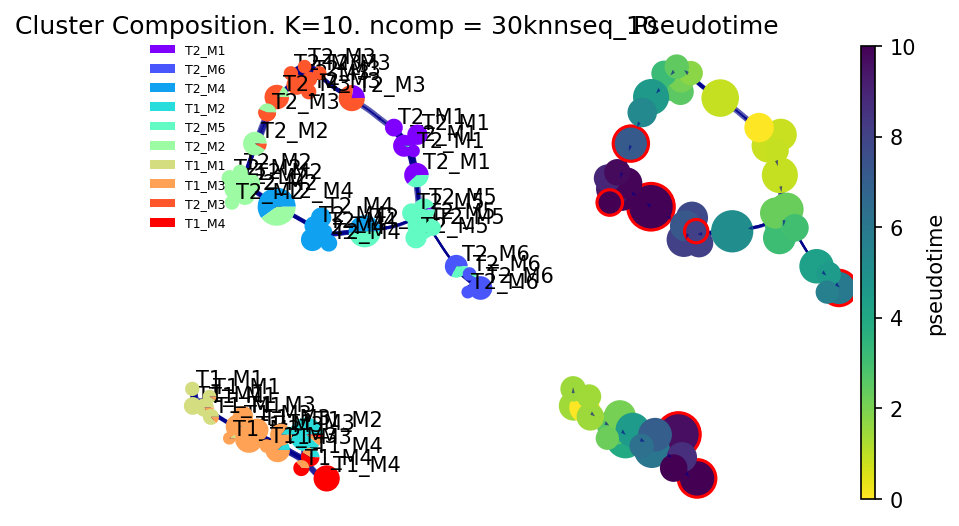

In [11]:
via.draw_piechart_graph(via0=v1,type_data='pt', ax_text=False) #set ax_text = False to remove the cluster labels on the pseudotime plot to view the structure more clearly (the labels indicate cluster number and cluster population)

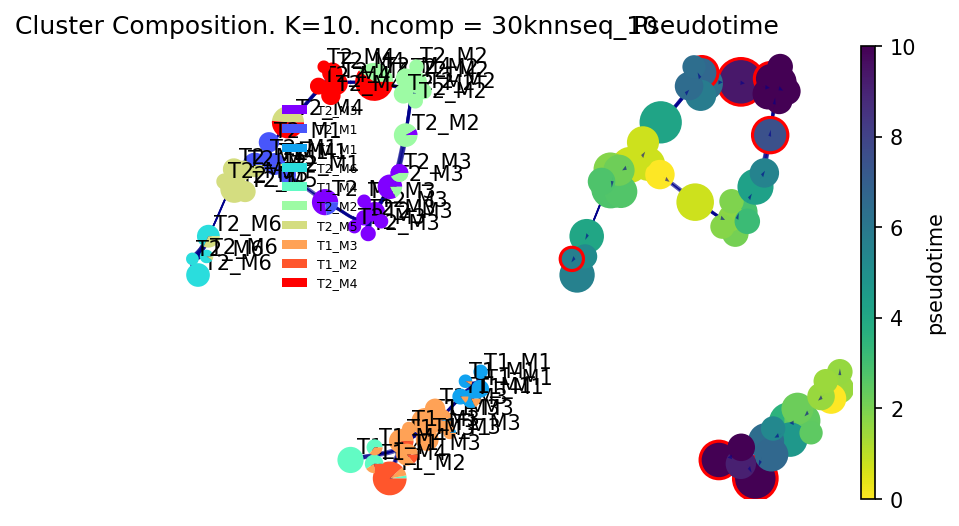

/home/shobi/PycharmProjects/Via/core_working.py:946: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  path_orange = G_orange.get_shortest_paths(super_root, to=fst_i)[0]
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

2022-06-13 12:17:23.218812	Super cluster 1 is a super terminal with sub_terminal cluster 10
2022-06-13 12:17:23.219252	Super cluster 5 is a super terminal with sub_terminal cluster 6
2022-06-13 12:17:23.219498	Super cluster 8 is a super terminal with sub_terminal cluster 39
2022-06-13 12:17:23.219733	Super cluster 9 is a super terminal with sub_terminal cluster 52
2022-06-13 12:17:23.219959	Super cluster 10 is a super terminal with sub_terminal cluster 0
2022-06-13 12:17:23.220184	Super cluster 11 is a super terminal with sub_terminal cluster 1
2022-06-13 12:17:23.220417	Super cluster 14 is a super terminal with sub_terminal cluster 4


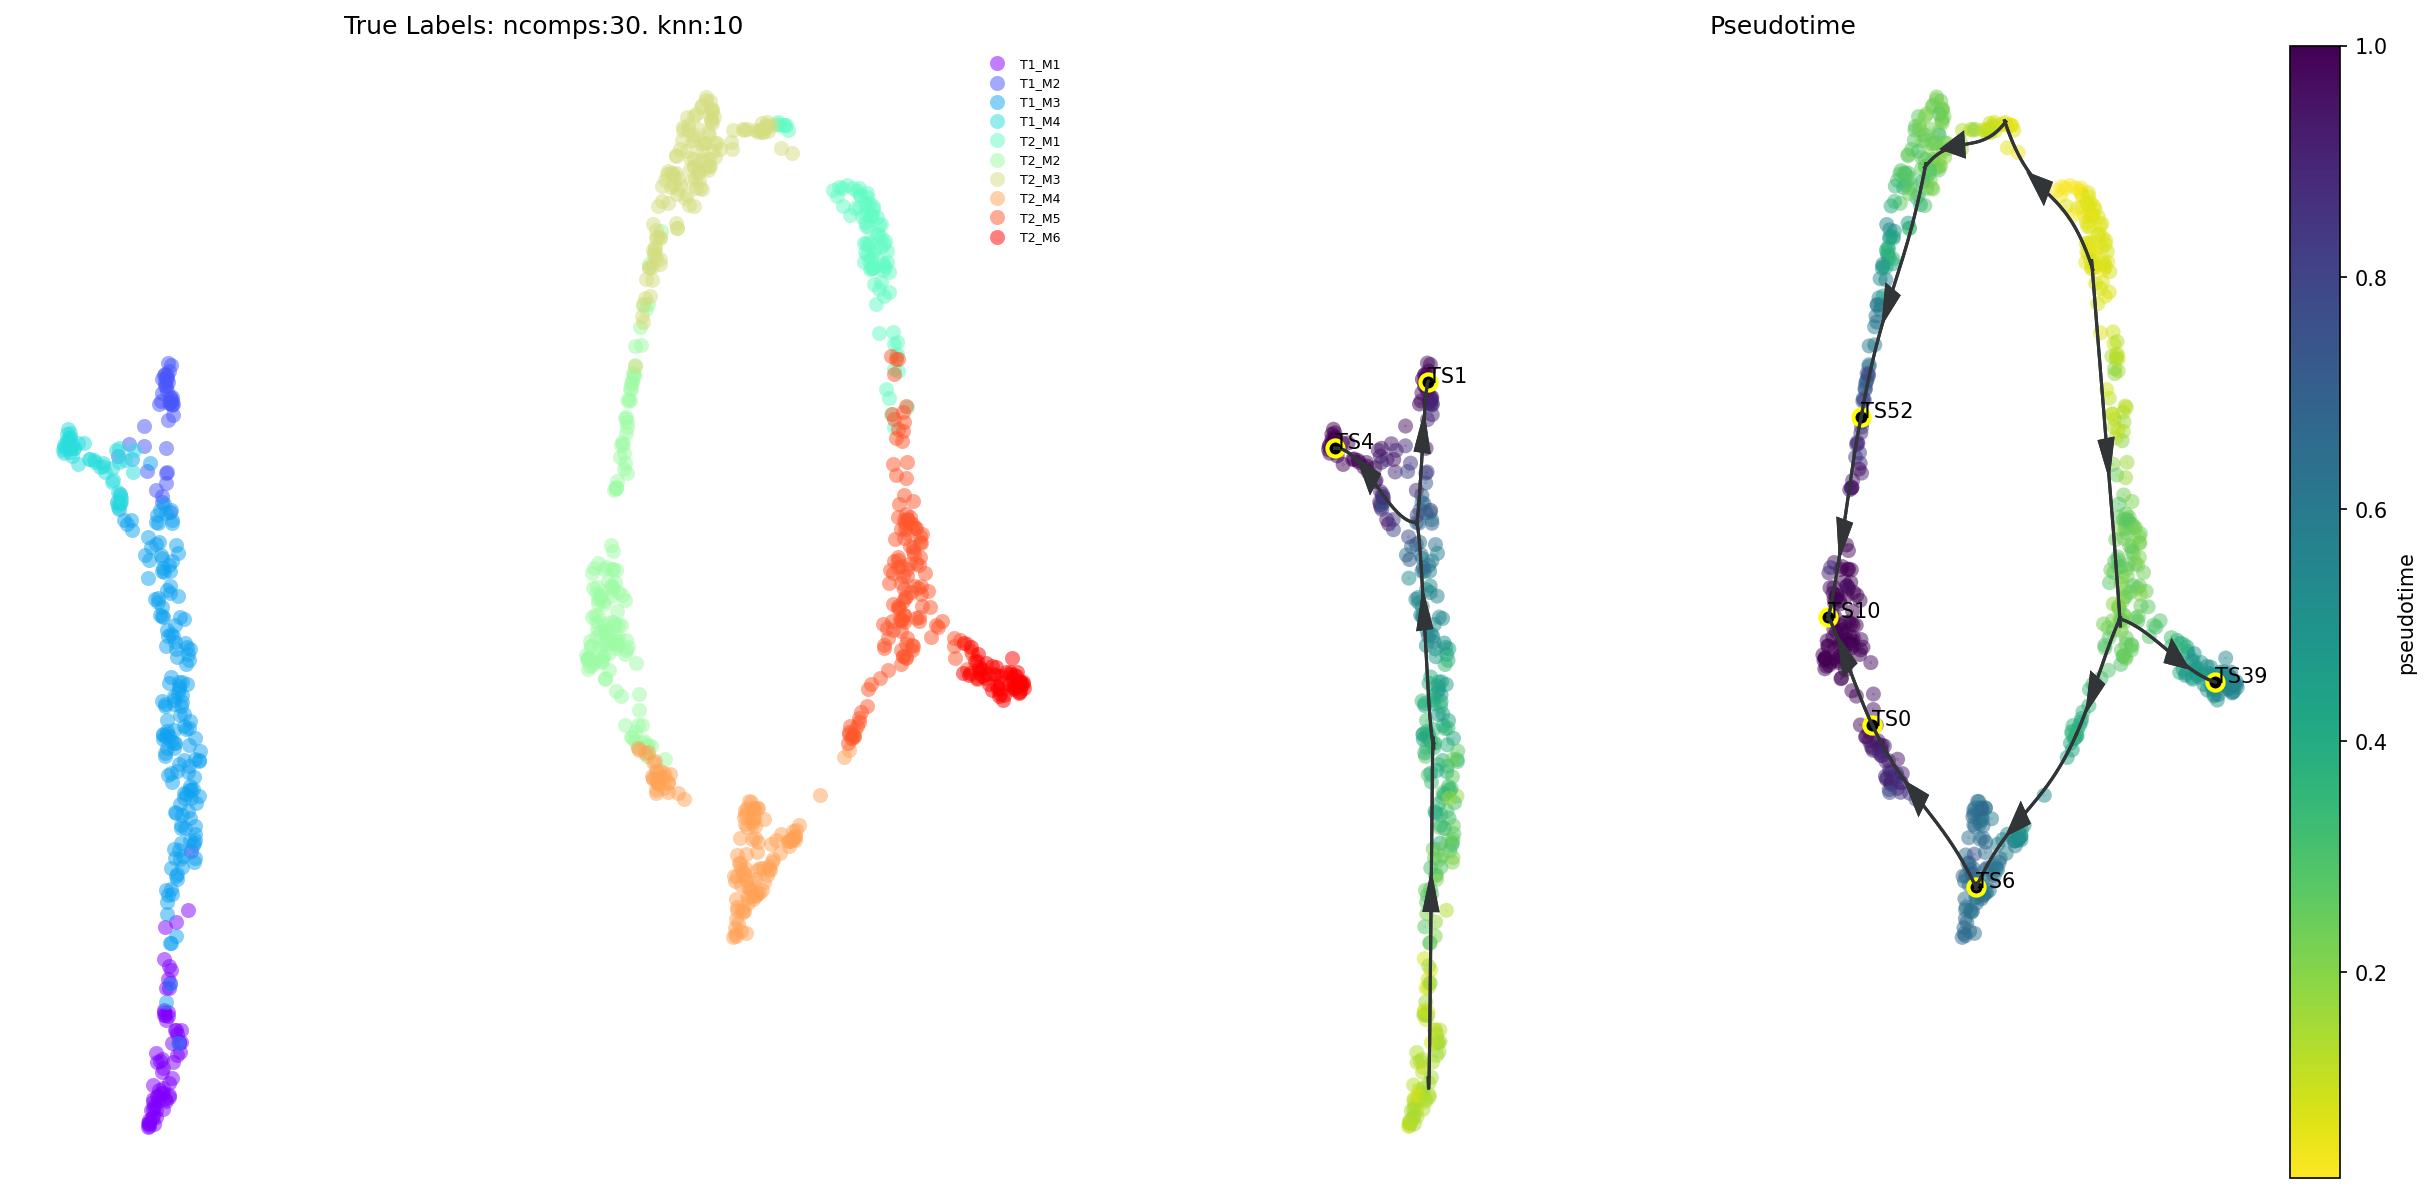

In [23]:
via.draw_trajectory_gams(via_coarse=v0, via_fine=v1, embedding=embedding)